### *Conclusão da analise exploratória:*

*############################################################################
############################################################################
############################################################################
############################################################################
##########################################

############################################################################
############################################################################
########

############################################################################
############################################################################
############################################################################
############################################################################
############################################################################
###############################################################*

# Insights

**Atingimos o nosso objetivo!**

Agora compreendemos melhor os dados que temos à nossa disposição para podermos realizar análises mais precisas, levando em consideração todas as nuances relativas aos dados, para obter os melhore Insights.

<img src="https://raw.githubusercontent.com/enzoschitini/Data-Science-Portfolio/main/01%20An%C3%A1lise%20explorat%C3%B3ria%20e%20limpeza%20de%20dados/Sinasc/image/INSIGHTS.png" alt="capa">

---

# **SINASC** • Sistema de Informação sobre Nascidos Vivos
Finalmente, aqui estamos no auge da nossa análise, o momento em que partimos para encontrar os insights que estão presos nos dados e trazê-los à tona. Além disso, depois de encontrá-los, temos que entendê-los e conectá-los ao contexto de onde se originam.

**PDF** Baixe um documento com resultados de toda a análise. [Baixar pdf]()

[Enzo Schitini](https://www.linkedin.com/in/enzoschitini/) - Data Scientist • Expert Bubble.io • UX & UI @ Nugus creator

---

## Como a análise será realizada:

<img src="https://raw.githubusercontent.com/enzoschitini/Data-Science-Portfolio/main/01%20An%C3%A1lise%20explorat%C3%B3ria%20e%20limpeza%20de%20dados/Sinasc/image/Insights.jpg" alt="capa">

### **`Nossos objetivos`**

<ol type="1">
  <li>Carregamento dos dados e dos pacotes</li>
</ol>

Se quiser acessar as respostas dessas perguntas vá para o próximo projeto: [Análise descritiva]()

### Importando os pacotes e os dados

In [621]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.express as px

pd.set_option('display.max_columns', None)

In [622]:
df = pd.read_csv('SINASC_RO_2019.csv').drop(columns='Unnamed: 0', axis=1)
df.head()

,IDADEMAE,ESTCIVMAE,ESCMAE,QTDFILVIVO,QTDFILMORT,GESTACAO,GRAVIDEZ,PARTO,CONSULTAS,DTNASC,HORANASC,SEXO,APGAR1,APGAR5,RACACOR,PESO,IDANOMAL,DTCADASTRO,NATURALMAE,DTNASCMAE,RACACORMAE,QTDGESTANT,QTDPARTNOR,QTDPARTCES,IDADEPAI,CONSPRENAT,MESPRENAT,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,DTNASC_DIA,DTNASC_MES,DTCADASTRO_DIA,DTCADASTRO_MES,DTNASCMAE_DIA,DTNASCMAE_MES
0,19,5.0,8 a 11 anos,0,0,37 a 41 semanas,Única,Cesáreo,4,2019-02-19,1620.0,Masculino,9,10,Branca,3685.0,2,2019-03-08,811,2019-03-08,1,0,0,0,26,8,1.0,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Terça-feira,Fevereiro,Sexta-feira,Março,Sexta-feira,Março
1,29,2.0,8 a 11 anos,1,0,37 a 41 semanas,Única,Cesáreo,4,2019-02-21,1830.0,Feminino,8,9,Branca,3055.0,2,2019-03-08,811,2019-03-08,1,1,0,1,24,10,2.0,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Quinta-feira,Fevereiro,Sexta-feira,Março,Sexta-feira,Março
2,37,9.0,8 a 11 anos,2,0,37 a 41 semanas,Única,Cesáreo,4,2019-02-25,915.0,Feminino,8,10,Branca,3460.0,2,2019-03-08,841,2019-03-08,1,2,1,1,32,8,1.0,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Segunda-feira,Fevereiro,Sexta-feira,Março,Sexta-feira,Março
3,30,5.0,12 anos ou mais,0,0,37 a 41 semanas,Única,Cesáreo,3,2019-03-20,835.0,Feminino,9,10,Parda,2982.0,2,2019-04-03,841,2019-04-03,4,0,0,0,24,6,2.0,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273,Quarta-feira,Março,Quarta-feira,Abril,Quarta-feira,Abril
4,30,2.0,8 a 11 anos,1,0,37 a 41 semanas,Única,Cesáreo,4,2019-03-23,750.0,Feminino,8,10,Parda,3310.0,2,2019-04-03,811,2019-04-03,4,1,0,1,27,8,2.0,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Sábado,Março,Quarta-feira,Abril,Quarta-feira,Abril


##

## Comportamento da mãe de acordo com a idade

In [623]:
def splitter(idade:int):
    if (idade >= 10) & (idade <= 15): 
        return '10 à 15 anos'
    elif (idade >= 15) & (idade <= 20):
        return '15 à 20 anos'
    elif (idade >= 20) & (idade <= 25):
        return '20 à 25 anos'
    elif (idade >= 25) & (idade <= 30):
        return '25 à 30 anos'
    elif (idade >= 30) & (idade <= 35):
        return '30 à 35 anos'
    elif (idade >= 40) & (idade <= 45):
        return '40 à 45 anos'
    elif (idade >= 45) & (idade <= 50):
        return '45 à 50 anos'

In [624]:
df['faixa_mae'] = df['IDADEMAE'].apply(splitter)

In [625]:
PAIS = df[df['IDADEPAI'] != 0]
display(PAIS.head(5))
print(PAIS.shape)

,IDADEMAE,ESTCIVMAE,ESCMAE,QTDFILVIVO,QTDFILMORT,GESTACAO,GRAVIDEZ,PARTO,CONSULTAS,DTNASC,HORANASC,SEXO,APGAR1,APGAR5,RACACOR,PESO,IDANOMAL,DTCADASTRO,NATURALMAE,DTNASCMAE,RACACORMAE,QTDGESTANT,QTDPARTNOR,QTDPARTCES,IDADEPAI,CONSPRENAT,MESPRENAT,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,DTNASC_DIA,DTNASC_MES,DTCADASTRO_DIA,DTCADASTRO_MES,DTNASCMAE_DIA,DTNASCMAE_MES,faixa_mae
0,19,5.0,8 a 11 anos,0,0,37 a 41 semanas,Única,Cesáreo,4,2019-02-19,1620.0,Masculino,9,10,Branca,3685.0,2,2019-03-08,811,2019-03-08,1,0,0,0,26,8,1.0,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Terça-feira,Fevereiro,Sexta-feira,Março,Sexta-feira,Março,15 à 20 anos
1,29,2.0,8 a 11 anos,1,0,37 a 41 semanas,Única,Cesáreo,4,2019-02-21,1830.0,Feminino,8,9,Branca,3055.0,2,2019-03-08,811,2019-03-08,1,1,0,1,24,10,2.0,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Quinta-feira,Fevereiro,Sexta-feira,Março,Sexta-feira,Março,25 à 30 anos
2,37,9.0,8 a 11 anos,2,0,37 a 41 semanas,Única,Cesáreo,4,2019-02-25,915.0,Feminino,8,10,Branca,3460.0,2,2019-03-08,841,2019-03-08,1,2,1,1,32,8,1.0,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Segunda-feira,Fevereiro,Sexta-feira,Março,Sexta-feira,Março,None
3,30,5.0,12 anos ou mais,0,0,37 a 41 semanas,Única,Cesáreo,3,2019-03-20,835.0,Feminino,9,10,Parda,2982.0,2,2019-04-03,841,2019-04-03,4,0,0,0,24,6,2.0,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273,Quarta-feira,Março,Quarta-feira,Abril,Quarta-feira,Abril,25 à 30 anos
4,30,2.0,8 a 11 anos,1,0,37 a 41 semanas,Única,Cesáreo,4,2019-03-23,750.0,Feminino,8,10,Parda,3310.0,2,2019-04-03,811,2019-04-03,4,1,0,1,27,8,2.0,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Sábado,Março,Quarta-feira,Abril,Quarta-feira,Abril,25 à 30 anos


(7089, 40)


### Comparando a idade da mãe e do pai

In [626]:
PAIS['faixa_pai'] = PAIS['IDADEPAI'].apply(splitter)
PAIS['diferenca'] = abs(PAIS['IDADEMAE'] - PAIS['IDADEPAI'])

C:\Users\Enzo Schitni\AppData\Local\Temp\ipykernel_7996\4211842173.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Enzo Schitni\AppData\Local\Temp\ipykernel_7996\4211842173.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Gráfico das idades

In [627]:
def grafico_faixas(minimo:int, maximo:int, X:str, hue:str):
    sns.displot(data = PAIS[(PAIS['IDADEMAE'] >= minimo) & (PAIS['IDADEMAE'] <= maximo)]
            ,x = X
            ,hue = hue
            ,bins = 10
            ,element = 'step'
            , kde = True
           )

c:\Users\Enzo Schitni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\Enzo Schitni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



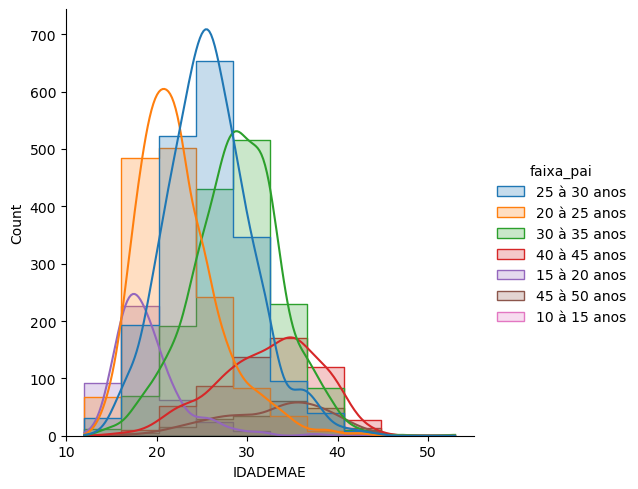

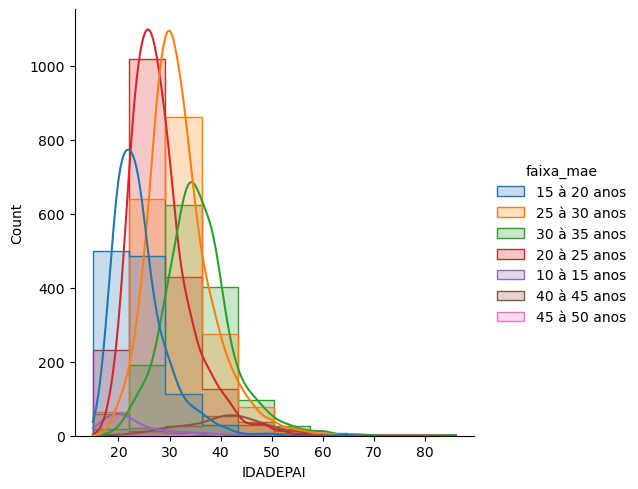

In [628]:
grafico_faixas(0, 80, 'IDADEMAE', 'faixa_pai')
grafico_faixas(0, 80, 'IDADEPAI', 'faixa_mae')

#### Pirâmide das idades

In [629]:
faixas = np.array(['10 à 15 anos', '15 à 20 anos', '20 à 25 anos', '25 à 30 anos', '30 à 35 anos', '40 à 45 anos', '45 à 50 anos'])

In [630]:
pais = {chave: PAIS.groupby('faixa_pai')['faixa_pai'].count().to_dict()[chave] for chave in faixas}
maes = {chave: PAIS.groupby('faixa_mae')['faixa_mae'].count().to_dict()[chave] for chave in faixas}

pais = np.array(list(pais.values()))
maes = np.array(list(maes.values()))

In [631]:
piramide = go.Figure()

piramide.add_trace(go.Bar(x = pais,
                         y = faixas,
                         orientation = "h",
                         name = "Pais",
                         marker = dict(color = "#32CD32")))

piramide.add_trace(go.Bar(x = -maes,
                         y = faixas,
                         orientation = "h",
                         name = "Mães",
                         marker = dict(color = "#E65CD9")))

piramide.update_layout(barmode = "overlay",
                      title = "Pirâmide das idades",
                      xaxis = dict(tickvals = [-2000, 0, 2000],
                                  title = "mil"),
                      plot_bgcolor = "white")

piramide.show()

#### Diferença baseada na idade média da mãe

In [632]:
faixa_mae_media = ['10 à 15 anos', '15 à 20 anos', '20 à 25 anos', '25 à 30 anos',
                   '30 à 35 anos', '40 à 45 anos', '45 à 50 anos']
faixa_mae_media = {chave: PAIS.groupby('faixa_mae')['diferenca'].mean().to_dict()[chave] for chave in faixa_mae_media}
fig = go.Figure()

fig.add_trace(go.Scatter(x=list(faixa_mae_media.keys()), y=list(faixa_mae_media.values()), mode='lines+markers', name='Atividade dos vendedores', line=dict(color='turquoise')))

fig.update_layout(plot_bgcolor="white", xaxis_title='Idade média da mãe', yaxis_title='Diferença de idade entre ela e o marido')

fig.show()

#### Escolaridade da mãe Vs diferença de idade entre ela e o marido:

In [633]:
ESCMAE = ['Nenhuma', '1 a 3 anos', '4 a 7 anos', '8 a 11 anos', '12 anos ou mais']
ESCMAE = {chave: PAIS.groupby('ESCMAE')['diferenca'].mean().to_dict()[chave] for chave in ESCMAE}
fig = go.Figure()

fig.add_trace(go.Scatter(x=list(ESCMAE.keys()), y=list(ESCMAE.values()), mode='lines+markers', name='Atividade dos vendedores', line=dict(color='turquoise')))

fig.update_layout(plot_bgcolor="white", xaxis_title='Escolaridade da mãe', yaxis_title='Diferença de idade entre ela e o marido')
fig.show()

### Menores de idade

In [634]:
print(PAIS[PAIS['IDADEMAE'] <= 18].shape)
print(PAIS[(PAIS['IDADEMAE'] <= 18) & (PAIS['IDADEPAI'] >= 19)].shape)

(627, 42)
(542, 42)


In [635]:
media = PAIS.groupby('faixa_mae')['diferenca'].mean().round()
massimo = PAIS.groupby('faixa_mae')['diferenca'].max()
minimo = PAIS.groupby('faixa_mae')['diferenca'].min()

display(pd.DataFrame({'Media': media, 'Massimo': massimo, 'Minimo': minimo}))

,Media,Massimo,Minimo
faixa_mae,,,
10 à 15 anos,8.0,25,1
15 à 20 anos,6.0,44,0
20 à 25 anos,6.0,35,0
25 à 30 anos,5.0,36,0
30 à 35 anos,5.0,54,0
40 à 45 anos,6.0,21,0
45 à 50 anos,10.0,12,9


In [636]:
media = PAIS.groupby('faixa_mae')['diferenca'].mean().round().to_dict()
fig = go.Figure()

fig.add_trace(go.Scatter(x=list(media.keys()), y=list(media.values()), mode='lines+markers', name='Atividade dos vendedores', line=dict(color='turquoise')))

fig.update_layout(plot_bgcolor="white", xaxis_title='Vendedores', yaxis_title='Valore')

fig.show()

In [637]:
def default(valore):
    if valore == '15 à 20 anos':
        return 1
    else:
        return 0

ML_model = PAIS.copy()
ML_model['default'] = ML_model['faixa_mae'].apply(default)

In [638]:
ML_model[['default']]#.value_counts()

,default
0,1
1,0
2,0
3,0
4,0
...,...
24325,0
24326,0
24327,0
24329,0


### A partir dos 35 anos, o que acontece?

## A escolha do tipo de parto | Cesario ou vaginal? E porque?

In [639]:
def line_graphic(list_dic, eixo_X, eixo_y, colors, names_line):
    fig = go.Figure()

    for dic, color, name_line in zip(list_dic, colors, names_line):
        fig.add_trace(go.Scatter(x=list(dic.keys()), y=list(dic.values()), mode='lines', name=name_line, line=dict(color=color)))
        fig.update_layout(plot_bgcolor="white", xaxis_title=eixo_y, yaxis_title=eixo_X)

    fig.show() # lightgrey turquoise # deepskyblue violet lightseagreen lightpink

In [640]:
cesareo_df = df[df['PARTO'] == 'Cesáreo']
vaginal_df = df[df['PARTO'] == 'Vaginal']

#### Nascimentos por tipo de parto

In [641]:
cesareo = cesareo_df.groupby('DTNASC')['DTNASC'].count().to_dict()
vaginal = vaginal_df.groupby('DTNASC')['DTNASC'].count().to_dict()
line_graphic([cesareo, vaginal], 'Quantidade', 'Datas', ['turquoise', 'lightgrey'], ['Parto Cesáreo', 'Parto Vaginal'])

## O rosto da sociedade

### Nascimentos no ano

In [642]:
nascimentos = df.groupby('DTNASC')['DTNASC'].count().to_dict()
line_graphic([nascimentos], 'Quantidade', 'Datas', ['turquoise'], ['Nascimentos'])

In [643]:
meninos = df[df['SEXO'] == 'Masculino'].groupby('DTNASC')['DTNASC'].count().to_dict()
meninas = df[df['SEXO'] == 'Feminino'].groupby('DTNASC')['DTNASC'].count().to_dict()
line_graphic([meninos, meninas], 'Quantidade', 'Datas', ['deepskyblue', 'lightpink'], ['Meninos', 'Meninas'])

## Saúde das crianças nascidas

## Desenvolvimento social e econômico por município

In [644]:
total_mun = len(list(set(df['munResNome'].to_list())))
print(f'Existem: {total_mun} municípios')

Existem: 52 municípios


---

## Rascunhos

<Axes: xlabel='ESCMAE'>

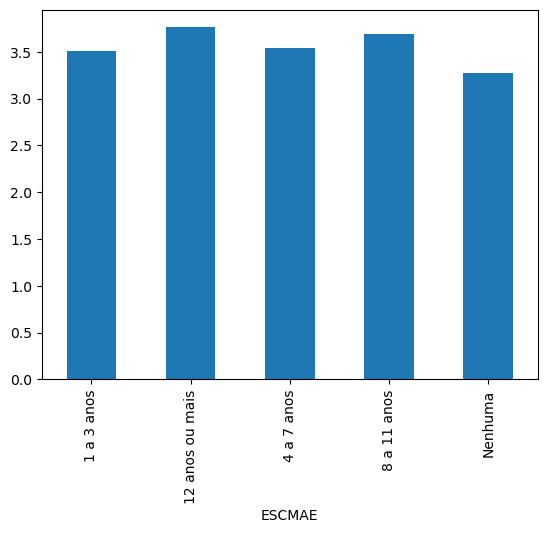

In [645]:
df.groupby('ESCMAE')['CONSULTAS'].mean().plot(kind='bar')

In [646]:
ESCMAE = ['Nenhuma', '1 a 3 anos', '4 a 7 anos', '8 a 11 anos', '12 anos ou mais']
ESCMAE = {chave: PAIS.groupby('ESCMAE')['diferenca'].mean().to_dict()[chave] for chave in ESCMAE}
fig = go.Figure()

fig.add_trace(go.Scatter(x=list(ESCMAE.keys()), y=list(ESCMAE.values()), mode='lines+markers', name='Atividade dos vendedores', line=dict(color='turquoise')))

fig.update_layout(plot_bgcolor="white", xaxis_title='Vendedores', yaxis_title='Valore')
fig.show()

fig = px.line(x=ESCMAE.keys(), y=ESCMAE.values(), 
              title=f"Escolaridade da mãe Vs diferença de idade entre ela e o marido:") 
fig.show()

---

<p align="center">
  Enzo Schitini
</p>

<p align="center">
  Data Scientist • Expert Bubble.io • UX & UI @ Nugus creator
</p>